In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import random
import pathlib
import shutil
import os.path
from os import path


In [ ]:
def class_classification(images):

  for image in images:
   img_id =int(re.findall(r'\d+' , str(image))[0])
   if ("bodianus" in str(image) or 337 <= img_id <= 461 ):
    shutil.copy(image,path_1)
   elif ("coris" in str(image) or 1224 <= img_id <= 1315):
    shutil.copy(image,path_2)
   elif ("epinephelus" in str(image) or 1410 <= img_id <= 1697):
    shutil.copy(image,path_3)
   elif ("halichoeres" in str(image) or 1814 <= img_id <= 2026):
    shutil.copy(image,path_4)
   elif ("lethrinus" in str(image) or 2223 <= img_id <= 2382):
    shutil.copy(image,path_5) 
   elif ("lutjanus" in str(image) or 2437 <= img_id <= 2755):
    shutil.copy(image,path_6)
   elif ("pseudanthias" in str(image) or 3390 <= img_id <= 3576):
    shutil.copy(image,path_7)
   elif ("thalassoma" in str(image) or 4112 <= img_id <= 4241):
    shutil.copy(image,path_8)

In [ ]:
path_1="/content/Fish_Image/bodianus"
path_2="/content/Fish_Image/coris"
path_3="/content/Fish_Image/epinephelus"
path_4="/content/Fish_Image/halichoeres"
path_5="/content/Fish_Image/lethrinus"
path_6="/content/Fish_Image/lutjanus"
path_7="/content/Fish_Image/pseudanthias"
path_8="/content/Fish_Image/thalassoma"
def extract_dataset():
 if (not path.exists("/content/Fish_Image")): 
   #making sure that the data is not already extracted
  !unzip "/content/drive/MyDrive/FishKaggle/archive (3).zip" -d "/content/"
  os.mkdir("/content/Fish_Image/")
  #!unrar x "/content/drive/MyDrive/FishKaggle/Talipia.rar" -d "/content/Fish_Image"
  os.mkdir(path_1)
  os.mkdir(path_2)
  os.mkdir(path_3)
  os.mkdir(path_4)  
  os.mkdir(path_5)
  os.mkdir(path_6)
  os.mkdir(path_7)
  os.mkdir(path_8) 
  data_dir_raw = pathlib.Path("/content/Fish_Data/images/raw_images")
  data_dir_cropped = pathlib.Path("/content/Fish_Data/images/cropped")
  data_dir_numbered = pathlib.Path("/content/Fish_Data/images/numbered")
  images = list(data_dir_numbered.glob('*')) + list(data_dir_raw.glob('*')) + list(data_dir_cropped.glob('*')) 
  class_classification(images)

In [ ]:
def class_classification(images):

  for image in images:
   img_id =int(re.findall(r'\d+' , str(image))[0])
   if ("bodianus" in str(image) or 337 <= img_id <= 461 ):
    shutil.copy(image,path_1)
   elif ("coris" in str(image) or 1224 <= img_id <= 1315):
    shutil.copy(image,path_2)
   elif ("epinephelus" in str(image) or 1410 <= img_id <= 1697):
    shutil.copy(image,path_3)
   elif ("halichoeres" in str(image) or 1814 <= img_id <= 2026):
    shutil.copy(image,path_4)
   elif ("lethrinus" in str(image) or 2223 <= img_id <= 2382):
    shutil.copy(image,path_5) 
   elif ("lutjanus" in str(image) or 2437 <= img_id <= 2755):
    shutil.copy(image,path_6)
   elif ("pseudanthias" in str(image) or 3390 <= img_id <= 3576):
    shutil.copy(image,path_7)
   elif ("thalassoma" in str(image) or 4112 <= img_id <= 4241):
    shutil.copy(image,path_8)

In [ ]:
def import_dataset(): 
  extract_dataset()
  data_dir="/content/Fish_Image/"
  batch_size = 128
  img_height = 120
  img_width = 120
  train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.1,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size,labels='inferred',label_mode='int')
  val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.1,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size,labels='inferred',label_mode='int')
  return train_ds,val_ds

In [ ]:
def create_model(): 
    img_height = 120
    img_width  = 120
    num_classes = 8 
    model = tf.keras.Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                             layers.Conv2D(32, 5, activation='relu'),
                             layers.MaxPooling2D(),
                             layers.Conv2D(32, 3, activation='relu'),
                             layers.MaxPooling2D(),
                             #layers.Conv2D(32, 3, activation='relu'),
                             #layers.MaxPooling2D(),
                             layers.Dropout(0.2),
                             layers.Flatten(),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(num_classes)])

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])
    return model

In [ ]:
def run_model() : 
    train_ds , val_ds = import_dataset()
    model = create_model()
    CNN_data = model.fit(train_ds,validation_data=val_ds,epochs=20)
    model.summary()

    acc = CNN_data.history['accuracy']
    val_acc = CNN_data.history['val_accuracy']

    loss = CNN_data.history['loss']
    val_loss = CNN_data.history['val_loss']
    epochs = 20
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Streaming output truncated to the last 5000 lines.
  inflating: /content/Fish_Data/images/numbered/526.png  
  inflating: /content/Fish_Data/images/numbered/527.png  
  inflating: /content/Fish_Data/images/numbered/528.png  
  inflating: /content/Fish_Data/images/numbered/529.png  
  inflating: /content/Fish_Data/images/numbered/53.png  
  inflating: /content/Fish_Data/images/numbered/530.png  
  inflating: /content/Fish_Data/images/numbered/531.png  
  inflating: /content/Fish_Data/images/numbered/532.png  
  inflating: /content/Fish_Data/images/numbered/533.png  
  inflating: /content/Fish_Data/images/numbered/534.png  
  inflating: /content/Fish_Data/images/numbered/535.png  
  inflating: /content/Fish_Data/images/numbered/536.png  
  inflating: /content/Fish_Data/images/numbered/537.png  
  inflating: /content/Fish_Data/images/numbered/538.png  
  inflating: /content/Fish_Data/images/numbered/539.png  
  inflating: /content/Fish_Data/images/numbered/54.png  
  inflating: /content/F

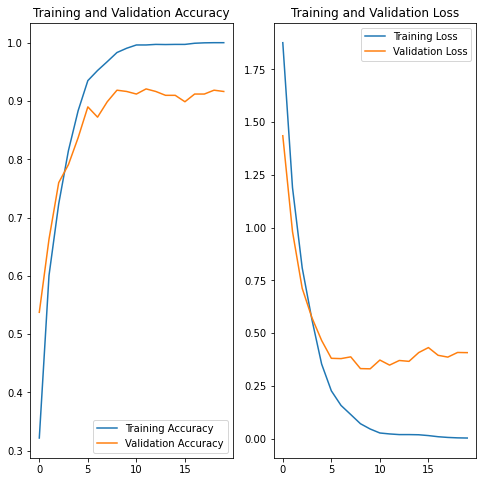

In [ ]:
run_model()